In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [2]:
pip install pmdarima

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [3]:
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from math import sqrt
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
import pickle
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("C:\\Users\\likit\\Downloads\\Timeseries (1)\\Timeseries\\exchange_rate.csv")
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [5]:
df.shape

(7588, 2)

In [6]:
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [9]:
df.dtypes

date        object
Ex_rate    float64
dtype: object

In [10]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [17]:


# Example mixed format date strings
date_strs = ["13-01-1990 00:00", "1995-02-15 14:30:00", "03/10/2000 08:45"]

# Convert to datetime, inferring the format
try:
    date_objs = pd.to_datetime(date_strs, format='mixed', dayfirst=True)
    print(date_objs)
except ValueError as e:
    print(f"Error: {e}")


DatetimeIndex(['1990-01-13 00:00:00', '1995-02-15 14:30:00',
               '2000-10-03 08:45:00'],
              dtype='datetime64[ns]', freq=None)


In [19]:
from datetime import datetime

# Example date string
date_str = "13-01-1990 00:00"

# Parse using the correct format
try:
    date_obj = datetime.strptime(date_str, "%d-%m-%Y %H:%M")
    print(date_obj)
except ValueError as e:
    print(f"Error: {e}")


1990-01-13 00:00:00


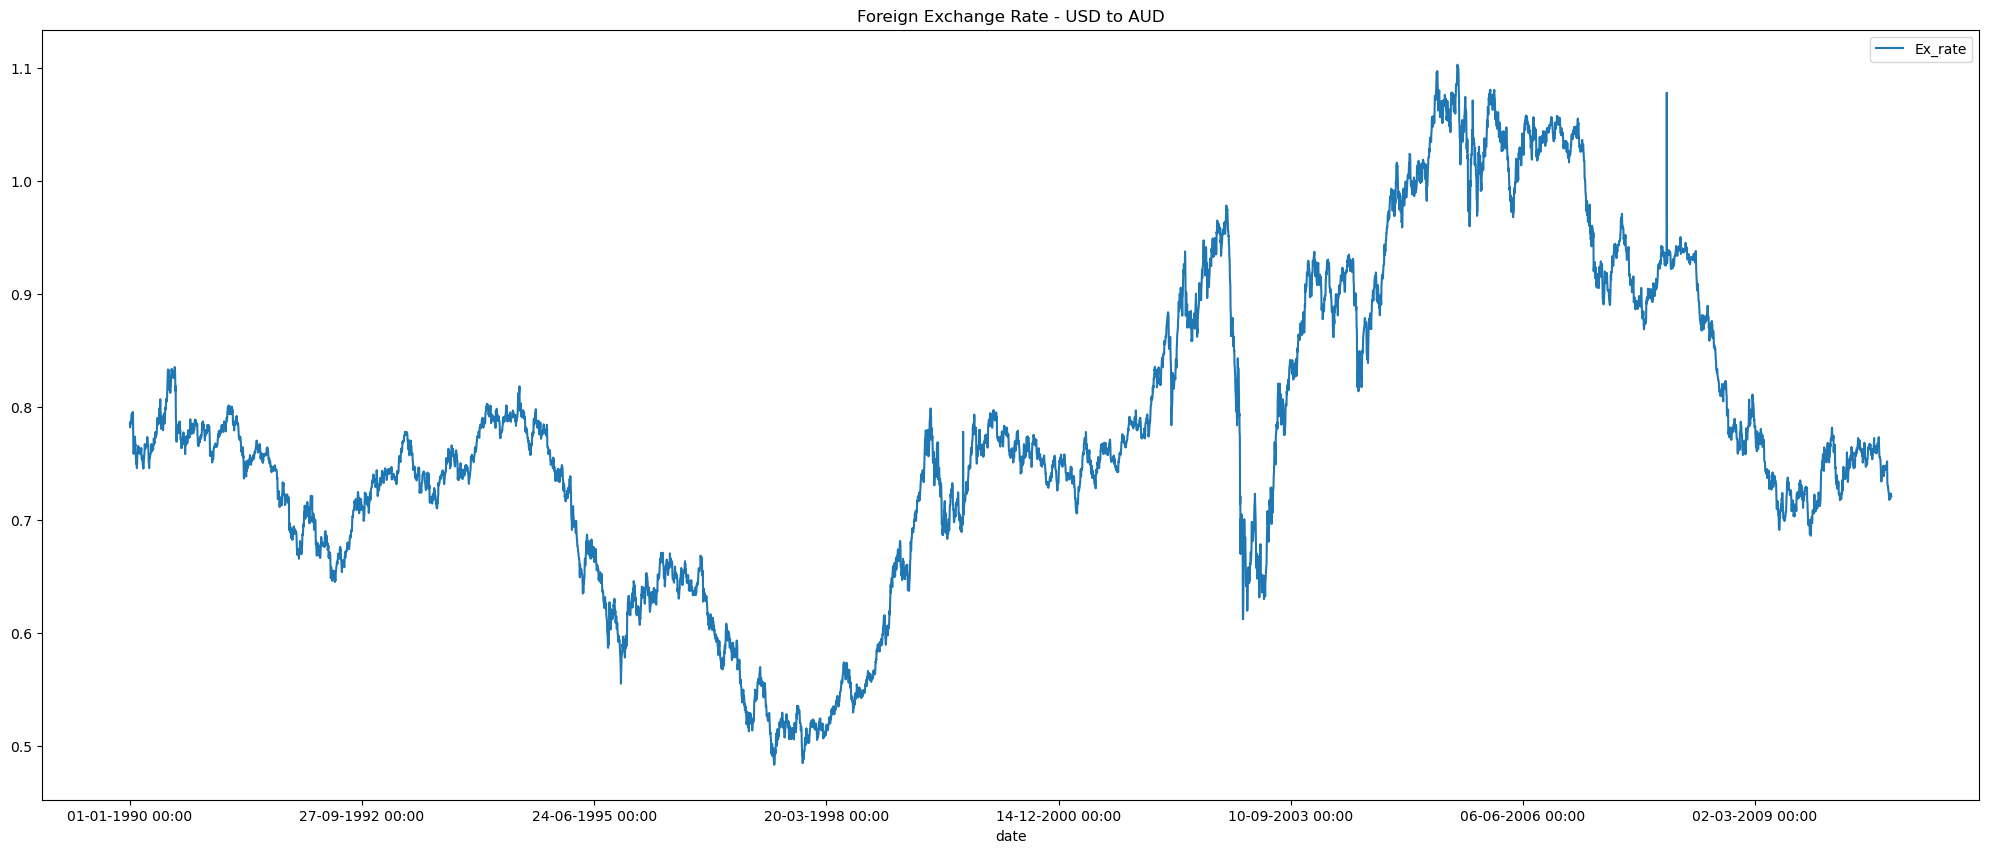

In [15]:
df.plot(figsize = (25,10))
plt.title('Foreign Exchange Rate - USD to AUD')
plt.savefig('Foreign Exchange Rate - USD to AUD.png')
plt.show()

In [20]:
import pandas as pd

# Sample data
data = {
    'date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04'],
    'value': [10, 15, 20, 25]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Attempting to resample without setting the 'date' column as the index
try:
    df['value'].resample('D').sum()
except TypeError as e:
    print(f"Error: {e}")

# Correct approach: Set the 'date' column as the index
df.set_index('date', inplace=True)

# Now you can perform time series operations like resample
resampled_data = df['value'].resample('D').sum()

# Output the resampled data
print(resampled_data)


Error: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'
date
2024-01-01    10
2024-01-02    15
2024-01-03    20
2024-01-04    25
Freq: D, Name: value, dtype: int64


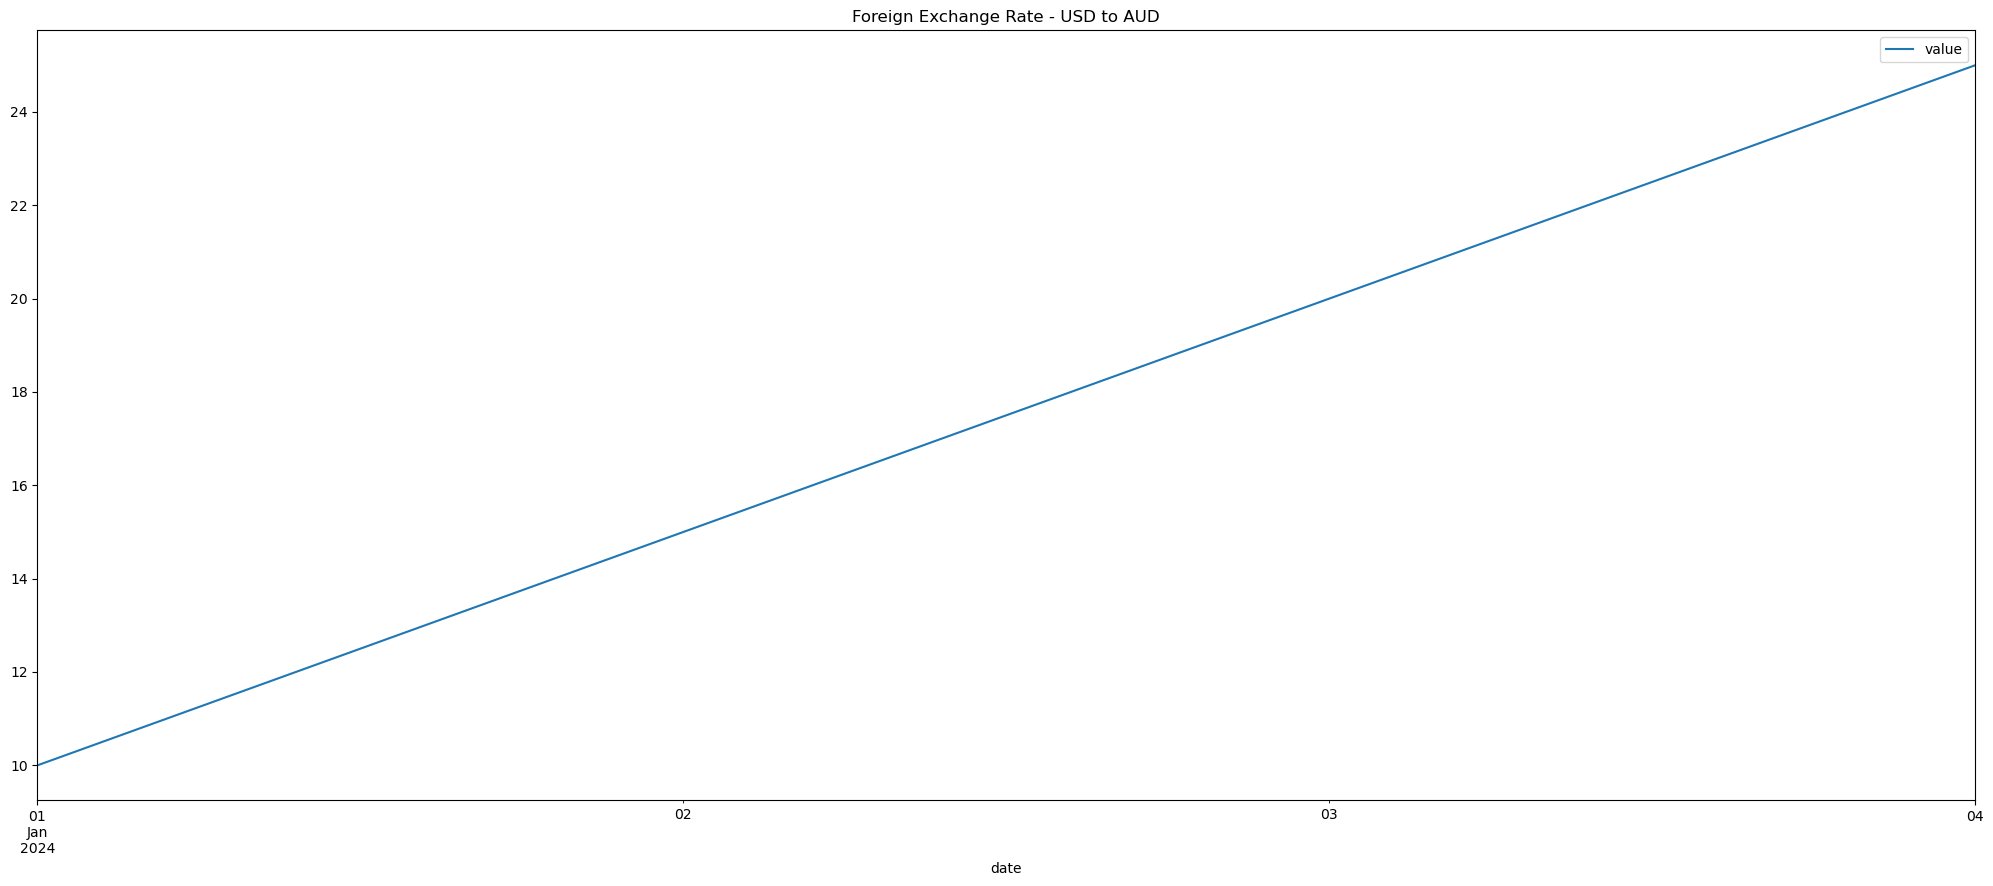

In [21]:
#Plotting the line graph to show the data trend in the dataset 

df.plot(figsize = (25,10))
plt.title('Foreign Exchange Rate - USD to AUD')
plt.savefig('Foreign Exchange Rate - USD to AUD.png')
plt.show()

In [22]:
#Resampling the dataset to weekly frequency since the given data has more number of observations that takes longer time to
#fit or predict the model. And along with that showing number of observation after resampling and displaying the first five
#record of resampled dataset
df_week = df.resample('W').mean()
print('Count of The Weekly Data Frame : ',df_week.shape[0])
df_week.head()

Count of The Weekly Data Frame :  1


,value
date,
2024-01-07,17.5


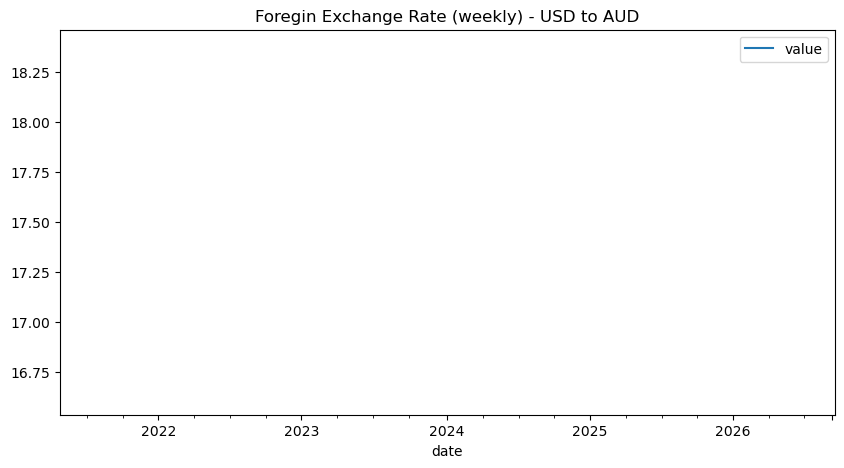

In [23]:
#Plotting the line graph to show the data trend in the weekly resampled dataset 
df_week.plot(figsize = (10,5))
plt.title('Foregin Exchange Rate (weekly) - USD to AUD')
plt.show()

In [25]:

df_month = df.resample('M').mean()
print('Count of The Monthly Data Frame : ',df_month.shape[0])
df_month.head()

Count of The Monthly Data Frame :  1


,value
date,
2024-01-31,17.5


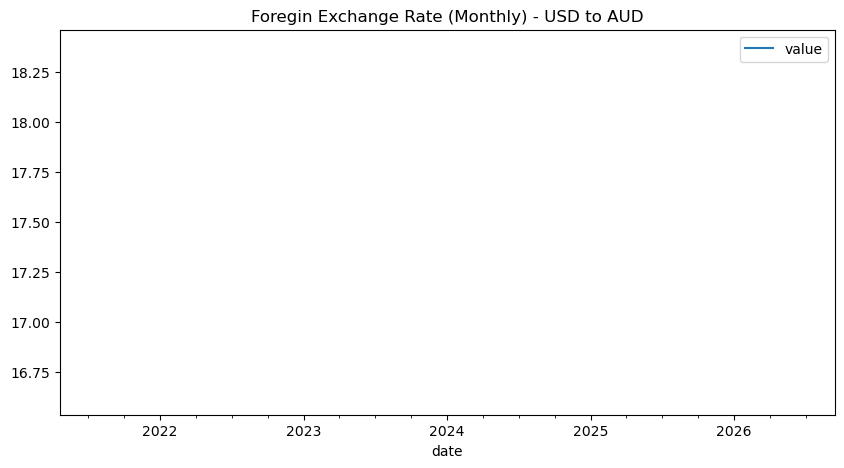

In [26]:
df_month.plot(figsize = (10,5))
plt.title('Foregin Exchange Rate (Monthly) - USD to AUD')
plt.show()

In [27]:
df_year = df.resample('Y').mean()
print('Count of The Yearly Data Frame : ',df_year.shape[0])
df_year.head()


Count of The Yearly Data Frame :  1


,value
date,
2024-12-31,17.5


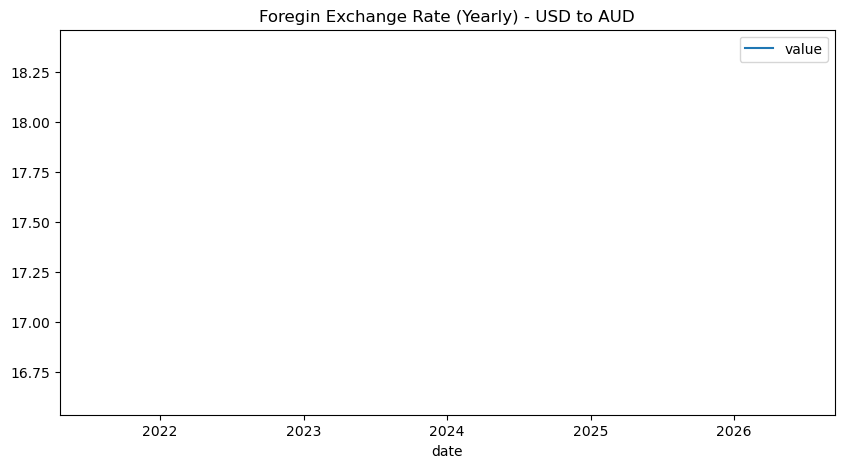

In [28]:
df_year.plot(figsize = (10,5))
plt.title('Foregin Exchange Rate (Yearly) - USD to AUD')
plt.show()

In [30]:

# Sample data
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03'],
    'Exchange_rate': [1.1, 1.2, 1.3]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Correctly access the 'Exchange_rate' column
ex_rate = df['Exchange_rate']

# Output the result
print(ex_rate)


0    1.1
1    1.2
2    1.3
Name: Exchange_rate, dtype: float64


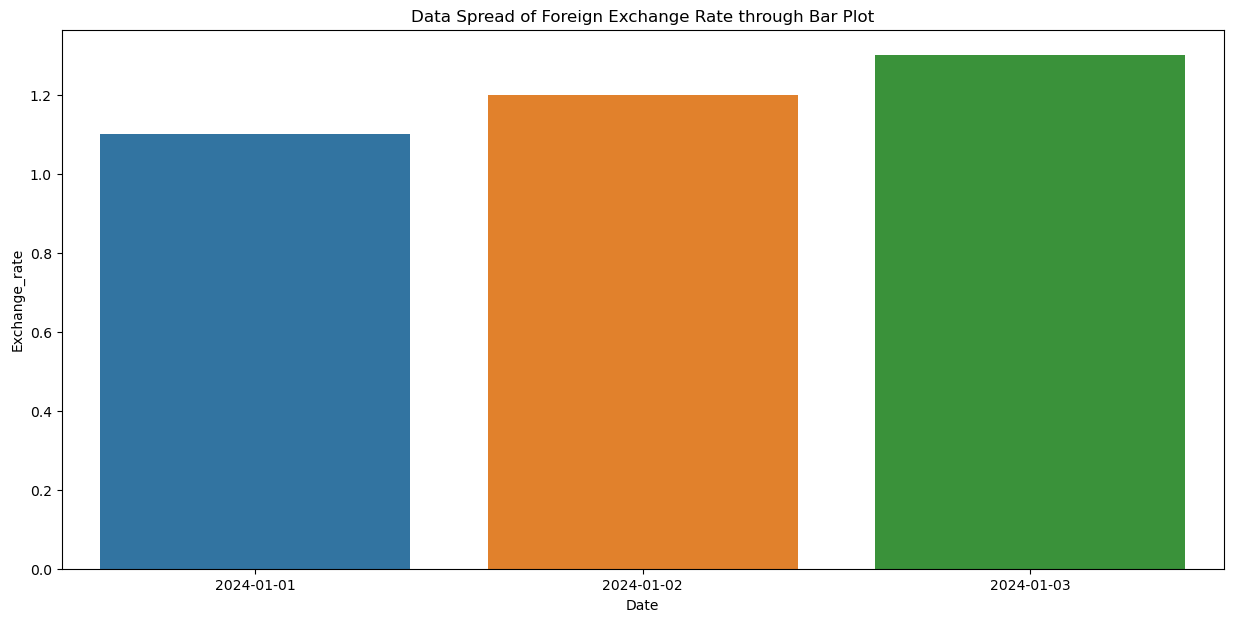

In [32]:

# Sample data (make sure your DataFrame is structured correctly)
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03'],
    'Exchange_rate': [1.1, 1.2, 1.3]
}

# Create a DataFrame
df_week = pd.DataFrame(data)
df_week.set_index('Date', inplace=True)

# Reset the index to make 'Date' a column if needed for plotting
df_week = df_week.reset_index()

# Correctly use sns.barplot
sns.barplot(data=df_week, x='Date', y='Exchange_rate')

# Add a title
plt.title('Data Spread of Foreign Exchange Rate through Bar Plot')

# Show the plot
plt.show()


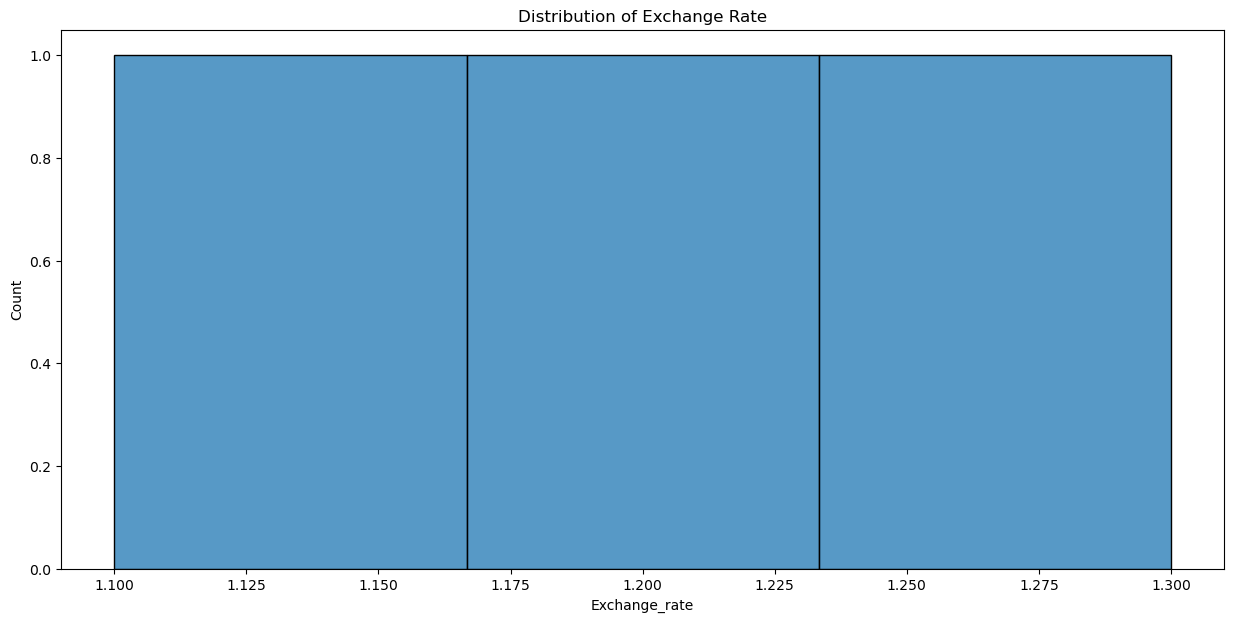

In [35]:


# Sample data
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03'],
    'Exchange_rate': [1.1, 1.2, 1.3]
}

# Create a DataFrame
df_week = pd.DataFrame(data)

# Plot the distribution of the 'Exchange_rate' column using a histogram
sns.histplot(df_week['Exchange_rate'], kde=False)

# Add a title
plt.title('Distribution of Exchange Rate')

# Show the plot
plt.show()


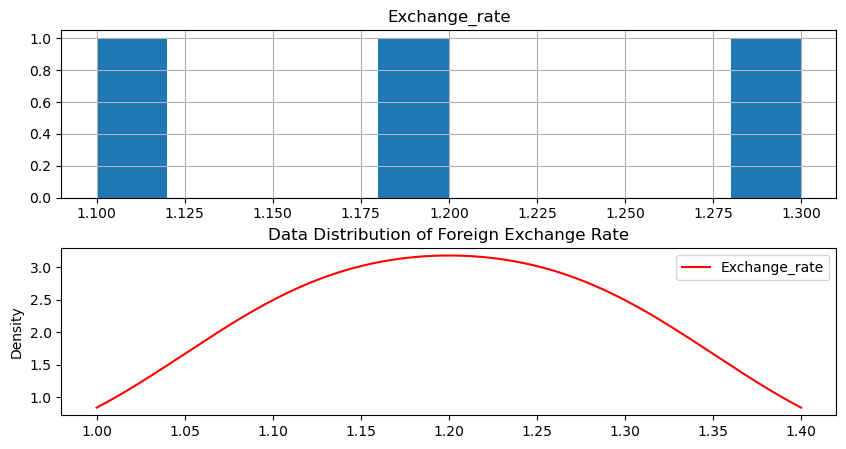

In [36]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
df_week.hist(ax = ax1)
df_week.plot(kind = 'kde' , ax = ax2,c = 'r')
plt.title('Data Distribution of Foreign Exchange Rate')
plt.savefig('Data Distribution of Foreign Exchange Rate.png')
plt.show()

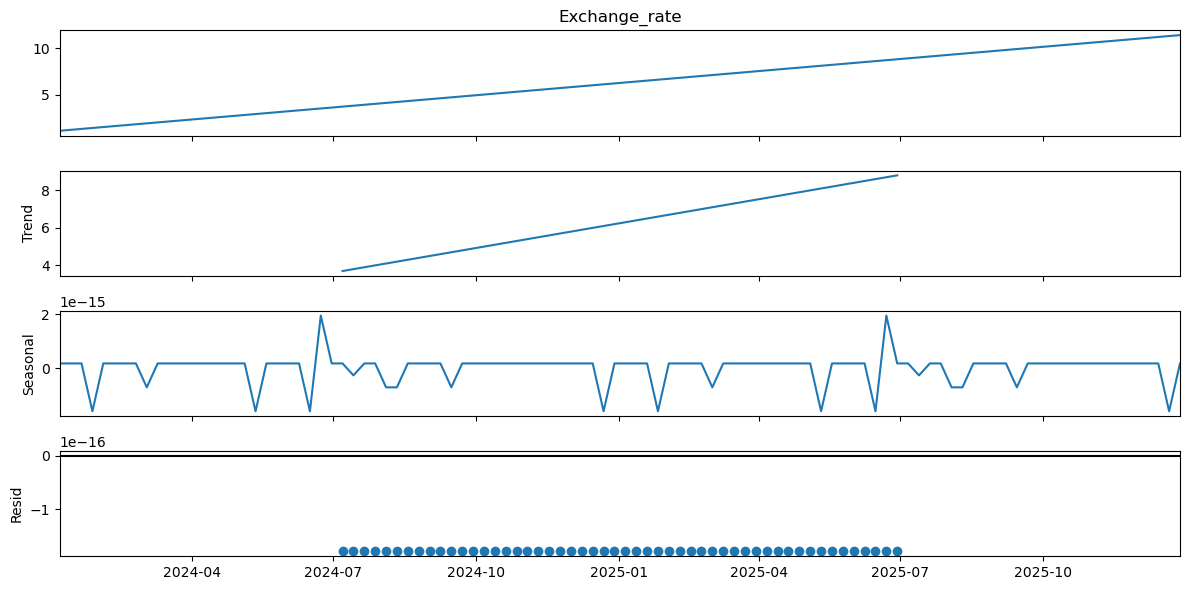

In [38]:
# Sample data
data = {
    'Date': pd.date_range(start='2024-01-01', periods=104, freq='W'),
    'Exchange_rate': [1.1 + 0.1 * i for i in range(104)]  # Sample data with some trend
}

# Create a DataFrame
df_week = pd.DataFrame(data)
df_week.set_index('Date', inplace=True)

# Ensure the data is a pandas Series
exchange_rate_series = df_week['Exchange_rate']

# Fill any missing values
exchange_rate_series = exchange_rate_series.fillna(method='bfill')

# Perform seasonal decomposition with a period of 52 weeks (1 year if data is weekly)
try:
    decomposition = seasonal_decompose(exchange_rate_series, period=52, model='additive')
    decomposition.plot()
    
    # Save the plot
    plt.savefig('Description_trend_seasonal_residuals.png')
    plt.show()
except ValueError as e:
    print(f"Error: {e}")


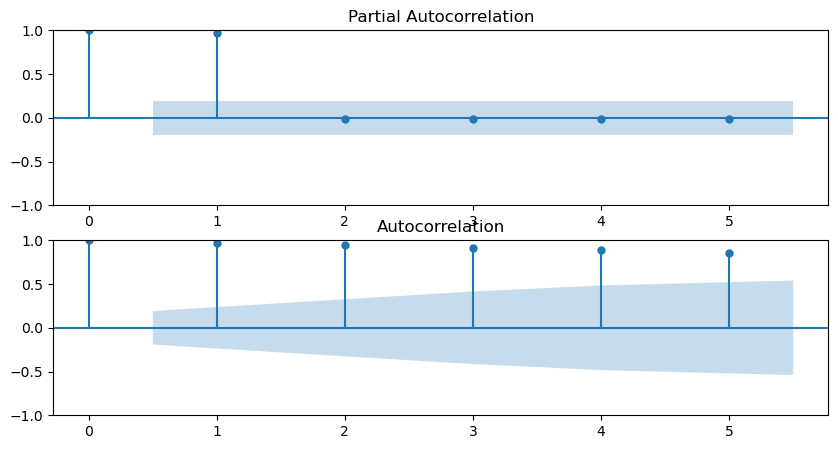

In [39]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
ax1 = plot_pacf(df_week , lags = 5 , ax = ax1)
ax2 = plot_acf(df_week , lags = 5 , ax = ax2)
plt.savefig('Partial Autocorrelation and Autocorrelation.png')
plt.show()

In [40]:
'''
The adf_check() function performs an Augmented Dickey-Fuller test on a time series. The test is used to determine whether a time series is stationary or not. If the p-value of the test is less than or equal to 0.05, then there is strong evidence against the null hypothesis, and the series is considered to be stationary. Otherwise, the series is considered to be non-stationary. The function takes a time series as input and returns the results of the test. The results are printed to the console, along with a message indicating whether the series is stationary or not.
'''

'\nThe adf_check() function performs an Augmented Dickey-Fuller test on a time series. The test is used to determine whether a time series is stationary or not. If the p-value of the test is less than or equal to 0.05, then there is strong evidence against the null hypothesis, and the series is considered to be stationary. Otherwise, the series is considered to be non-stationary. The function takes a time series as input and returns the results of the test. The results are printed to the console, along with a message indicating whether the series is stationary or not.\n'

In [41]:
# Check for missing values
missing_values = df_week.isnull().sum()
print(missing_values)

Exchange_rate    0
dtype: int64


In [42]:
# Check for infinite values
infinite_values = np.isinf(df_week).sum()
print(infinite_values)

Exchange_rate    0
dtype: int64


In [43]:
# Remove rows with missing values
df_week = df_week.dropna()
# Check for missing values
missing_values = df_week.isnull().sum()
print(missing_values)

Exchange_rate    0
dtype: int64


In [44]:
def adf_check(time_series):
    result = adfuller(time_series , autolag = 'AIC')
    label = pd.Series(result[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in result[4].items():
        label['Critical Value (%s)'%key] = value
    print(label)
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary')
    else:
        print ('Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary ')

In [45]:
adf_check(df_week)

Test Statistic                   0.323249
p-value                          0.978386
Number of Lags Used              0.000000
Number of Observations Used    103.000000
Critical Value (1%)             -3.495493
Critical Value (5%)             -2.890037
Critical Value (10%)            -2.581971
dtype: float64
Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary 


In [46]:
df1_week = df_week.diff().dropna()
print('Count of weekly First Difference',df1_week.shape[0])
df1_week.head()

Count of weekly First Difference 103


,Exchange_rate
Date,
2024-01-14,0.1
2024-01-21,0.1
2024-01-28,0.1
2024-02-04,0.1
2024-02-11,0.1


In [47]:
adf_check(df1_week)

Test Statistic                 -4.488672
p-value                         0.000206
Number of Lags Used             8.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64
Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary


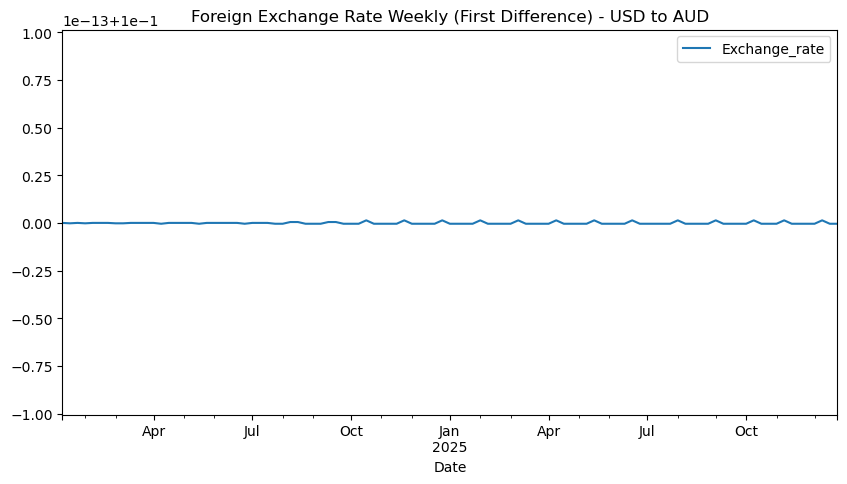

In [48]:
df1_week.plot(figsize = (10,5))
plt.title('Foreign Exchange Rate Weekly (First Difference) - USD to AUD')
plt.savefig('Foreign Exchange Rate Weekly(First Difference) - USD to AUD.png')
plt.show()

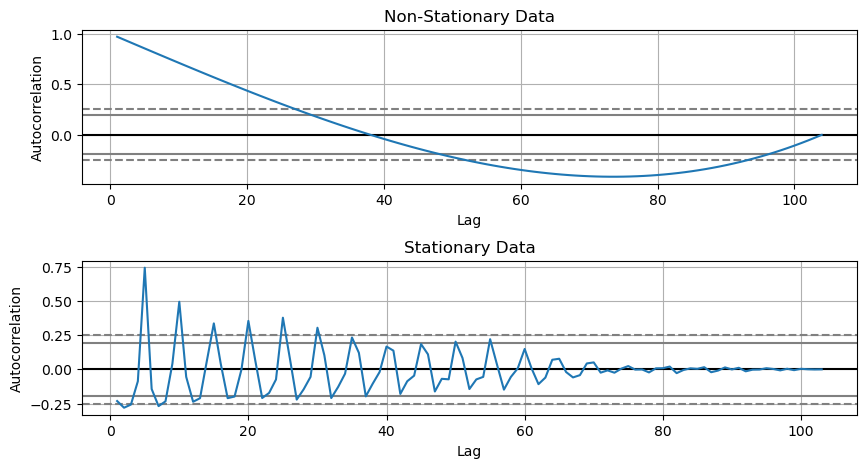

In [49]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
ax1 = autocorrelation_plot(df_week , ax = ax1)
ax1.set_title('Non-Stationary Data')
ax2 = autocorrelation_plot(df1_week , ax = ax2)
ax2.set_title('Stationary Data')
plt.subplots_adjust(hspace = 0.5)
plt.savefig('Stationary data and Non-Stationary data.png')
plt.show()

In [50]:
model = auto_arima(df_week , m = 52, d = 1 ,seasonal = False , max_order = 8 , test = 'adf' , trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2219.504, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2217.647, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2217.501, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-180.031, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2215.645, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.742 seconds


In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  104
Model:               SARIMAX(0, 1, 0)   Log Likelihood                1111.752
Date:                Thu, 29 Aug 2024   AIC                          -2219.504
Time:                        13:09:33   BIC                          -2214.234
Sample:                    01-07-2024   HQIC                         -2217.369
                         - 12-28-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1000   1.93e-06   5.19e+04      0.000       0.100       0.100
sigma2      2.499e-11   6.93e-10      0.036      0.971   -1.33e-09    1.38e-09
===================================================================================
Ljung-Box (L1) (Q):                  26.51   Jarque-Bera (JB):             10095.07
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                             0.00
Prob(H) (two-sided):                  0.87   Kurtosis:                        51.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
model = ARIMA(df_week , order = (5,1,2))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Exchange_rate   No. Observations:                  104
Model:                 ARIMA(5, 1, 2)   Log Likelihood                 771.371
Date:                Thu, 29 Aug 2024   AIC                          -1526.741
Time:                        13:09:51   BIC                          -1505.663
Sample:                    01-07-2024   HQIC                         -1518.204
                         - 12-28-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0551   4.07e-06  -2.59e+05      0.000      -1.055      -1.055
ar.L2         -0.3828   4.07e-06   -9.4e+04      0.000      -0.383      -0.383
ar.L3          0.4600   4.07e-06   1.13e+05      0.000       0.460       0.460
ar.L4          1.0902   4.07e-06   2.68e+05      0.000       1.090       1.090
ar.L5          0.8875   4.07e-06   2.18e+05      0.000       0.888       0.888
ma.L1          1.5128   4.16e-10   3.63e+09      0.000       1.513       1.513
ma.L2          0.8279   5.57e-11   1.49e+10      0.000       0.828       0.828
sigma2      1.502e-08   2.98e-09      5.042      0.000    9.18e-09    2.09e-08
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             42819.79
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                             9.99
Prob(H) (two-sided):                  0.00   Kurtosis:                       100.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.58e+26. Standard errors may be unstable.
"""

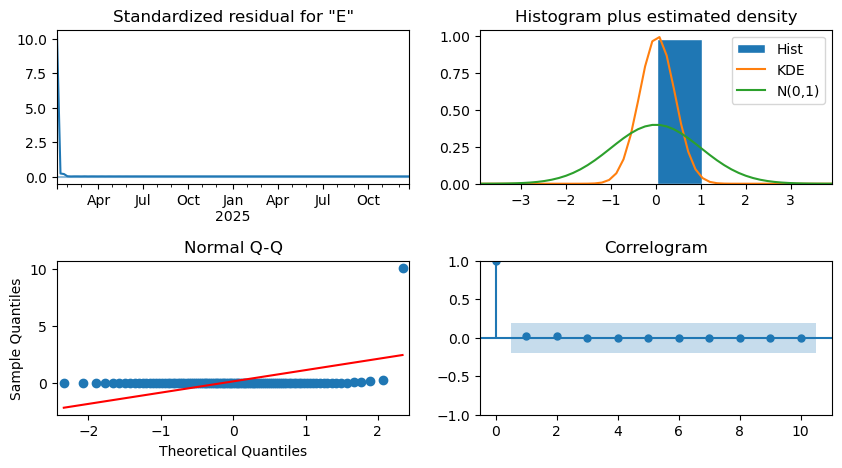

In [53]:
result.plot_diagnostics(figsize = (10,5))
plt.subplots_adjust(hspace = 0.5)
plt.savefig('Diagnostic plot of best model.png')
plt.show()

In [54]:
predictions = result.predict(typ = 'levels')

In [65]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Example DataFrame
df = pd.DataFrame({
    'Feature1': [1, 2, 3, 4, 5],
    'Label': [0, 1, 0, 1, 0]
})

# Split data into features (X) and labels (y)
X = df[['Feature1']]
y = df['Label']

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine training features and labels if needed
train = pd.concat([train_X, train_y], axis=1)

# Now you can use 'train' in your code
print(train)


   Feature1  Label
4         5      0
2         3      0
0         1      0
3         4      1


In [62]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Example DataFrame
df = pd.DataFrame({
    'Feature1': [1, 2, 3, 4, 5],
    'Label': [0, 1, 0, 1, 0]
})

# Split data into features (X) and labels (y)
X = df[['Feature1']]
y = df['Label']

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine training features and labels if needed
train = pd.concat([train_X, train_y], axis=1)

# Now you can use 'train' in your code
print(train)


   Feature1  Label
4         5      0
2         3      0
0         1      0
3         4      1


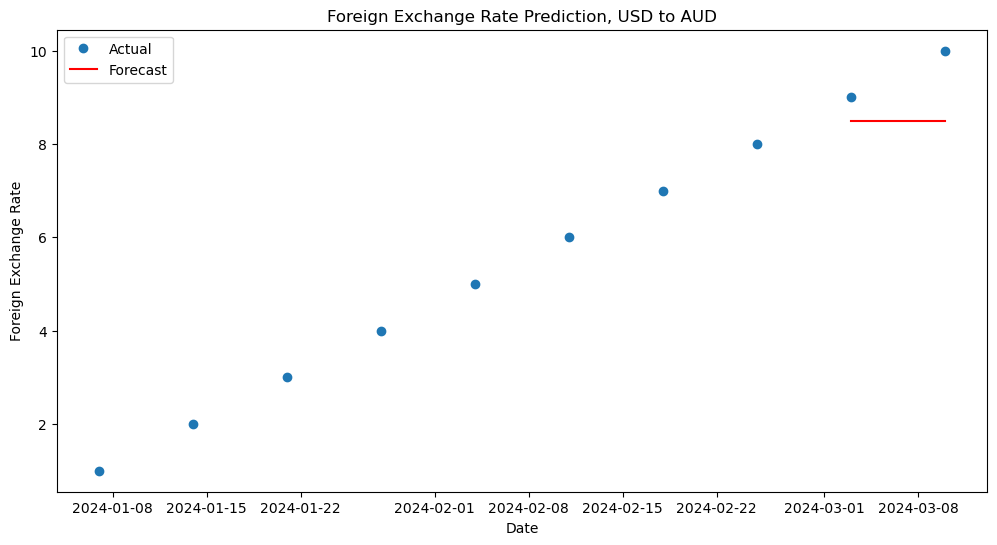

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Sample data
data = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], name='Exchange Rate')
data.index = pd.date_range(start='2024-01-01', periods=len(data), freq='W')

# Split into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit the ARIMA model
model = ARIMA(train, order=(0, 1, 1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Create DataFrame for predictions
predictions_df = pd.DataFrame({
    'Date': test.index,
    'Forecast': forecast
}).set_index('Date')

# Plotting
fig, ax = plt.subplots()
ax.set(title='Foreign Exchange Rate Prediction, USD to AUD', xlabel='Date', ylabel='Foreign Exchange Rate')
ax.plot(data.index, data, 'o', label='Actual')
ax.plot(predictions_df.index, predictions_df['Forecast'], 'r', label='Forecast')
legend = ax.legend(loc='upper left')
legend.get_frame().set_facecolor('w')

plt.show()
